## Iris Data Set

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
X = df.drop(['species'],axis=1)
y = df['species']
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


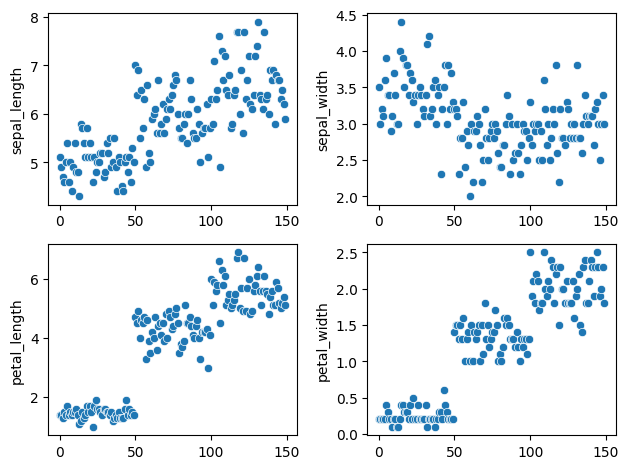

In [10]:
a=0
for i in X.columns:
    a += 1
    plt.subplot(2,2,a)
    sns.scatterplot(X[i])
plt.tight_layout()
plt.show()

## Clustering

### Kmeans ALL

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

---
Comment

Text(0.5, 1.0, 'Inertia of range_n_clusters')

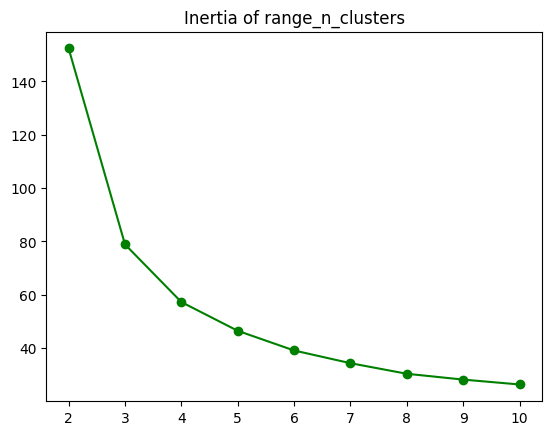

In [12]:
## Check best clusters
range_n_clusters = range(2,11)

inertia = []
for i in range_n_clusters :
    kmeans = KMeans(n_clusters=i,algorithm='auto',random_state=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range_n_clusters,inertia,marker='o',color='green')
plt.title('Inertia of range_n_clusters')

using elbow method good number of cluster should be **3**.


### using Silhouette score for Evaluation

In [13]:
from sklearn.metrics import silhouette_samples
Silhouette_avg_list = []
sil_sample_list = []
for i in range_n_clusters :
  kmeans = KMeans(n_clusters=i,random_state=10)
  
  cluster_labels = kmeans.fit_predict(X)

  Silhouette_avg_list.append(silhouette_score(X,cluster_labels))

  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  sil_sample_list.append(sample_silhouette_values)

  # print(f'with n_cluster : {i} ,Silhouette Coefficient : {sample_silhouette_values} ')

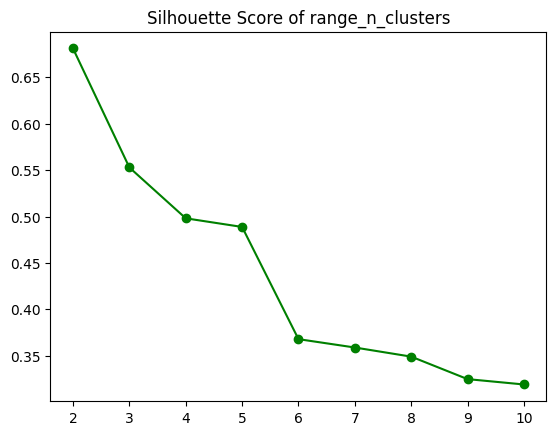

In [14]:
plt.title('Silhouette Score of range_n_clusters')
plt.plot(range_n_clusters,Silhouette_avg_list,marker='o',color='green')

through analysis of above graph we can assume better options are 2,3,4,5 .

---
**Drawback of Silhouette Score**:
The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

---

*Silhouette coefficient of All postive values is consider to be good for our model.*

Text(0, 0.5, 'Number of Clusters')

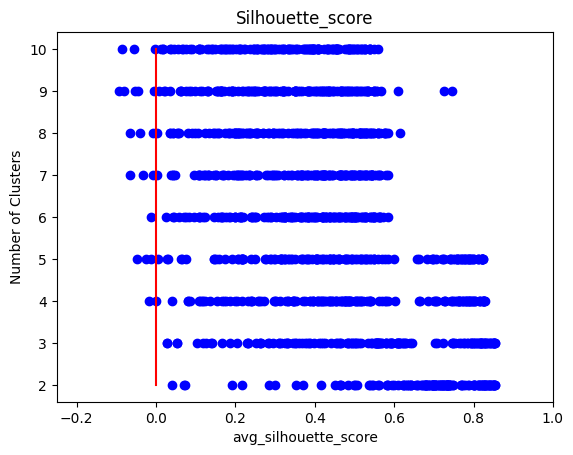

In [15]:
## plot
plt.title('Silhouette_score')
plt.plot(sil_sample_list,range_n_clusters,'bo' ,color='blue')
plt.xlim((-0.25,1))
plt.plot(np.zeros(100),np.linspace(2,10,100),color='red')
plt.xlabel('avg_silhouette_score')
plt.ylabel('Number of Clusters')

### As shown in plot cluster values with (4,5,6,7,8,9,10) have negative Silhouette Coefficients in it. So They are not good for our evaluation. so using cluster value of 2,3 would be good choice

## Ploting number of clusters using Kmeans

In [16]:
k=3
kmeans = KMeans(n_clusters=k)

In [17]:
label = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

In [18]:
label.shape,X.shape

((150,), (150, 4))

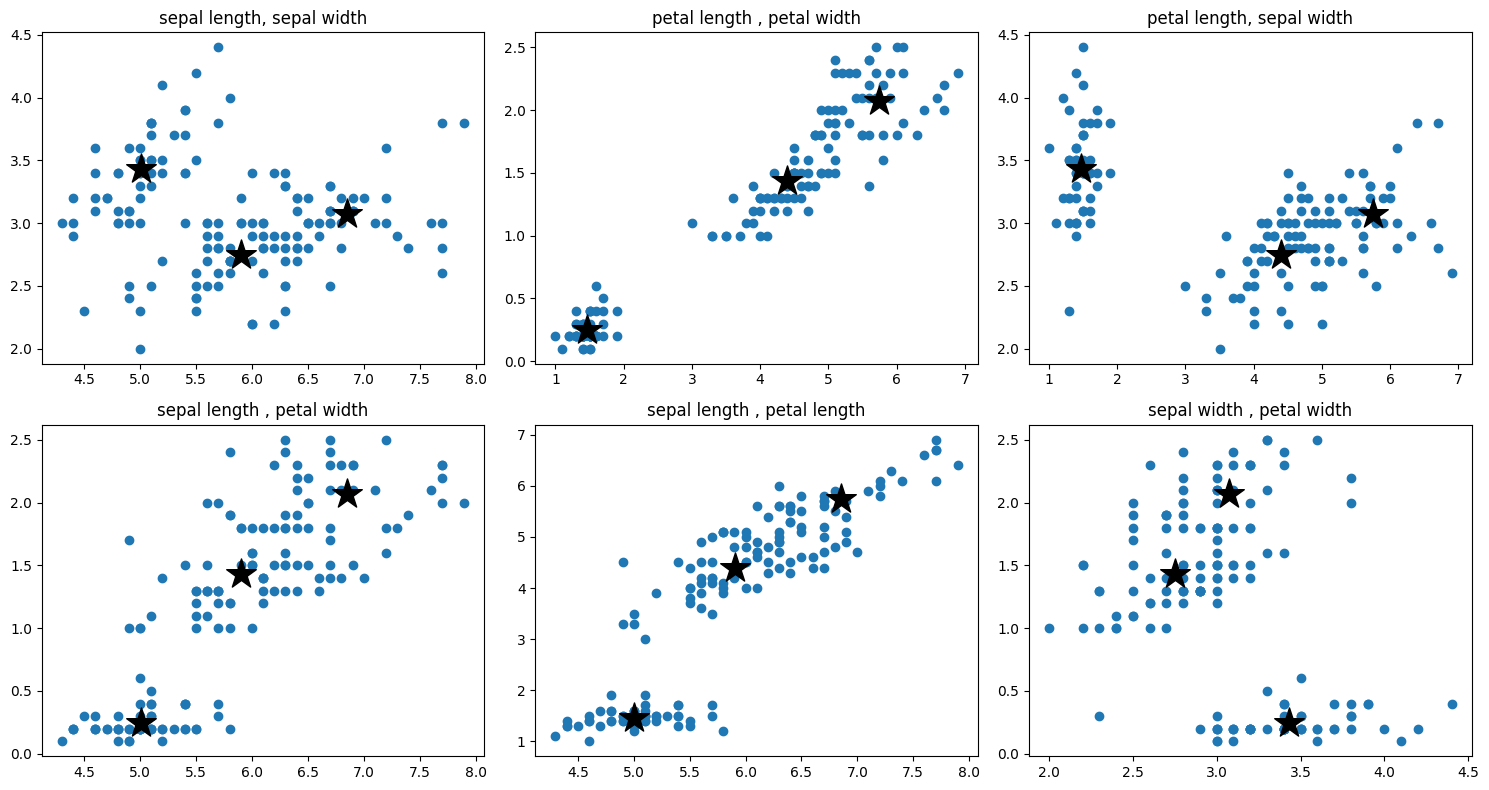

In [19]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.scatter(X['sepal_length'],X['sepal_width'])
plt.title('sepal length, sepal width')
plt.scatter(centers[:,0],centers[:,1],marker='*', color='black',s=500)

plt.subplot(2,3,2)
plt.scatter(X['petal_length'],X['petal_width'])
plt.title('petal length , petal width')
plt.scatter(centers[:,2],centers[:,3],marker='*', color='black',s=500)

plt.subplot(2,3,3)
plt.scatter(X['petal_length'],X['sepal_width'])
plt.title('petal length, sepal width')
plt.scatter(centers[:,2],centers[:,1],marker='*', color='black',s=500)

plt.subplot(2,3,4)
plt.scatter(X['sepal_length'],X['petal_width'])
plt.title('sepal length , petal width')
plt.scatter(centers[:,0],centers[:,3],marker='*', color='black',s=500)

plt.subplot(2,3,5)
plt.scatter(X['sepal_length'],X['petal_length'])
plt.title('sepal length , petal length')
plt.scatter(centers[:,0],centers[:,2],marker='*', color='black',s=500)

plt.subplot(2,3,6)
plt.scatter(X['sepal_width'],X['petal_width'])
plt.title('sepal width , petal width')
plt.scatter(centers[:,1],centers[:,3],marker='*', color='black',s=500)


plt.tight_layout()
plt.show()

Complete